In [92]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

In [93]:
# Audio Data Augmentations for Waveform (Time Domain)
PATH="0b56bcfe_nohash_0.wav"
original_audio, sample_rate = librosa.load(PATH)

In [94]:
print(sample_rate)

22050


In [95]:
import os
print(os.getcwd())


F:\Audio_classification\notebooks


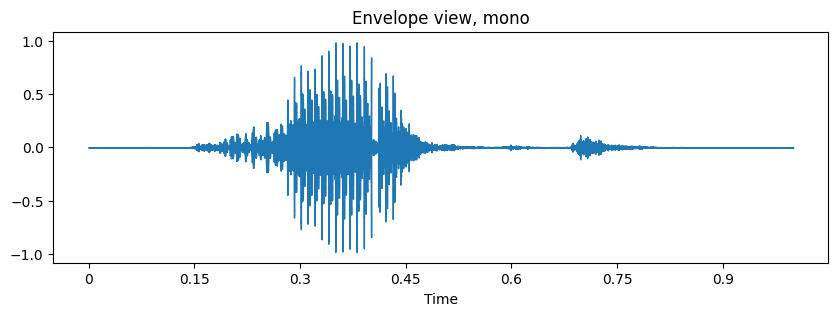

In [96]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(original_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [97]:
print(sample_rate)

22050


In [98]:
import soundfile as sf

In [99]:
# White Noise
noise_factor = 0.05
white_noise = np.random.randn(len(original_audio)) * noise_factor
augmented_audio = original_audio + white_noise

In [100]:
sf.write("augmented.wav",augmented_audio,sample_rate)

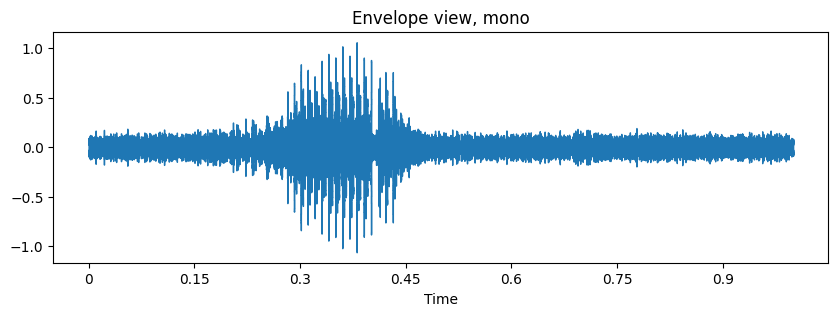

In [101]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(augmented_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [102]:
# Changing pitch
pitch_factor=1
pitch_audio = librosa.effects.pitch_shift(y=original_audio, sr=sample_rate, n_steps=pitch_factor)

In [103]:
augmented_audio = original_audio + pitch_audio

In [104]:
sf.write("augmented.wav",augmented_audio,sample_rate)

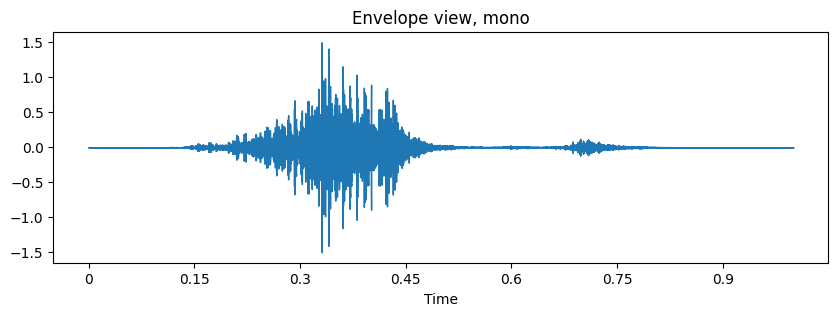

In [105]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(augmented_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [106]:
print(sample_rate)

22050


In [107]:
# Time shift
shift_audio = np.roll(original_audio, 2000)

In [108]:
augmented_audio = original_audio + shift_audio

In [109]:
sf.write("augmented.wav",augmented_audio,sample_rate)

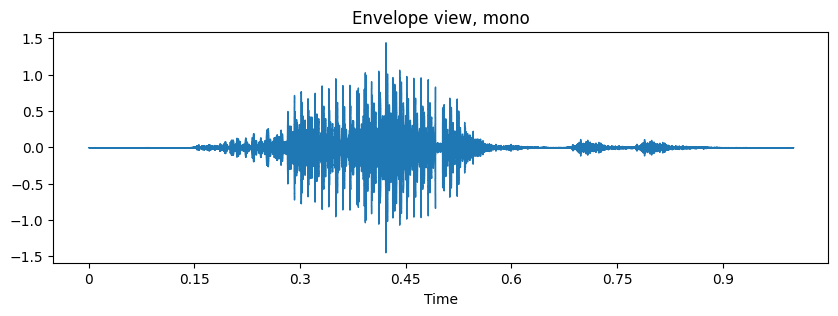

In [110]:
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(augmented_audio, sr=sample_rate, ax=ax)
ax.set_title(label='Envelope view, mono')
ax.label_outer()

In [111]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

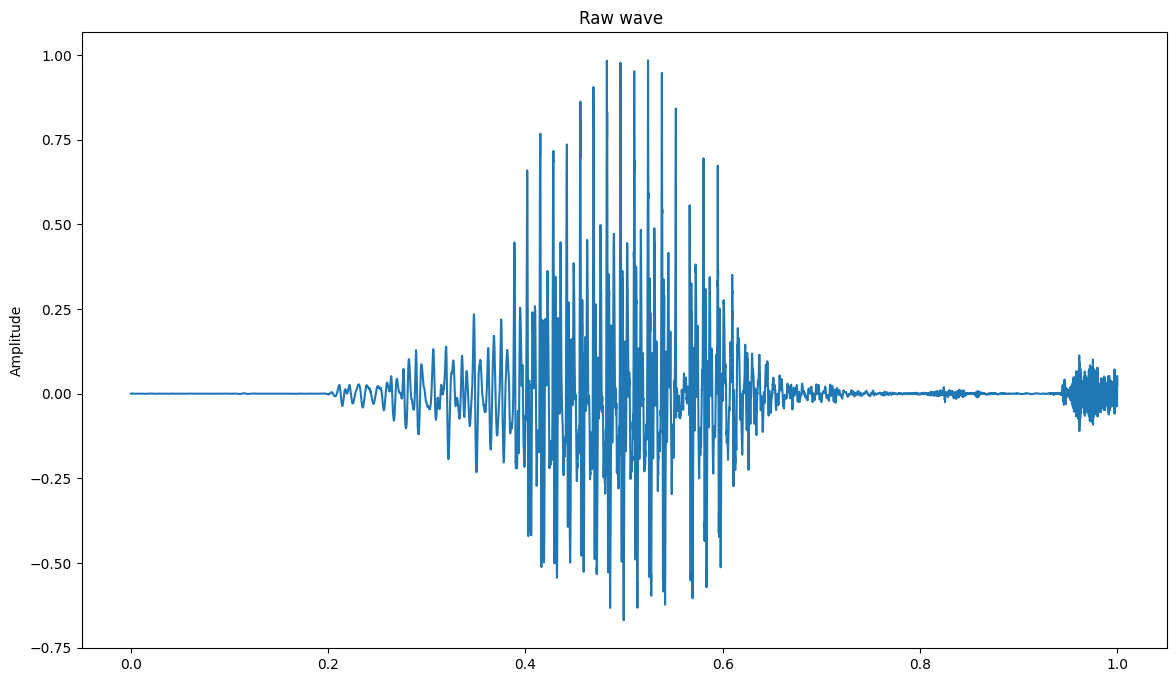

In [112]:
data = load_audio_file("0b56bcfe_nohash_0.wav")
plot_time_series(data)

This makes the sound deeper but we can still hear 'left' 


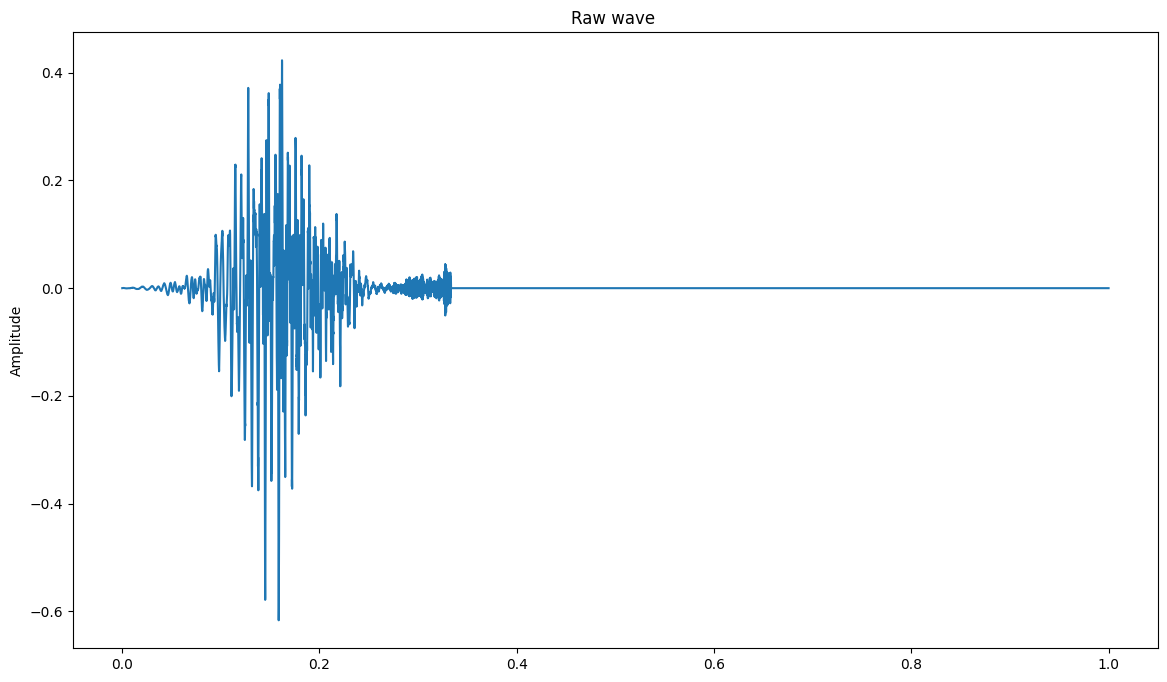

In [122]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(y=data, rate=rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 3.0)
print("This makes the sound deeper but we can still hear 'left' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

#data_stretch =stretch(data, 1.2)
#print("Higher frequencies  ")
#plot_time_series(data_stretch)
#ipd.Audio(data_stretch, rate=16000)

In [123]:
len(data)

16000

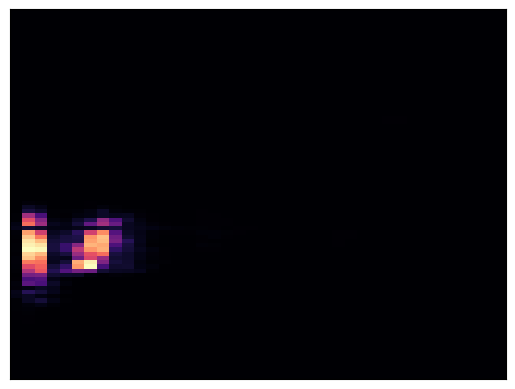

In [133]:
# Audio Data Augmentations for Spectrograms (Frequency Domain)
original_melspec = librosa.feature.melspectrogram(y = original_audio,
                                                  sr = sample_rate, 
                                                  n_fft = 512, 
                                                  hop_length = 256, 
                                                  n_mels = 40).T
librosa.display.specshow(original_melspec)
original_melspec = librosa.power_to_db(original_melspec)

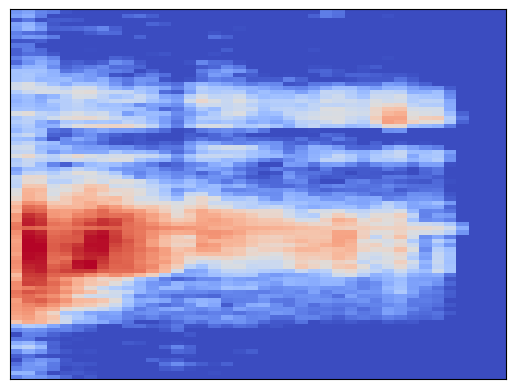

In [134]:
librosa.display.specshow(original_melspec)

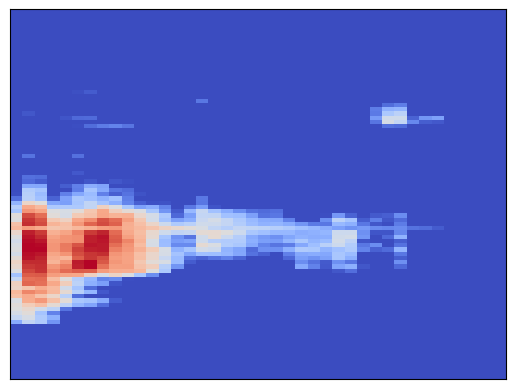

In [135]:
# Audio Data Augmentations for Spectrograms (Frequency Domain)
original_melspec = librosa.feature.melspectrogram(y = original_audio,
                                                  sr = sample_rate, 
                                                  n_fft = 512, 
                                                  hop_length = 256, 
                                                  n_mels = 40).T
original_melspec = librosa.amplitude_to_db(original_melspec)
librosa.display.specshow(original_melspec)